In [1]:
using Revise, NeuralNetworkAnalysis, JLD2, DifferentialEquations
const NNA = NeuralNetworkAnalysis
const RA = ReachabilityAnalysis;

In [2]:
controller = NNA.read_nnet_mat("/home/sguadalupe/.julia/dev/NeuralNetworkAnalysis/models/Single-Pendulum/controller_single_pendulum.mat", act_key="act_fcns");

In [3]:
const m = 0.5
const L = 0.5
const c = 0.
const g = 1.0
const gL = g/L
const mL = 1/(m*L^2)

function single_pendulum!(dx, x, params, t)
    dx[1] = x[2]
    dx[2] = gL * sin(x[1]) + mL*(x[3] - c*x[2])
    dx[3] = zero(x[3]) # T = x[3]
    return dx
end

single_pendulum! (generic function with 1 method)

In [9]:
X₀ = Hyperrectangle(low=[1.0, 0.0], high=[1.2, 0.2]);
U₀ = Universe(1)
prob = @ivp(x' = single_pendulum!(x), dim: 3, x(0) ∈ X₀ × U₀)
vars_idx = Dict(:state_vars=>1:2, :input_vars=>[], :control_vars=>[3]);
plant = ControlledPlant(prob, controller, vars_idx, 0.05);

In [10]:
simulations, controls, inputs = NeuralNetworkAnalysis.simulate(plant, T=20.0, trajectories=10);

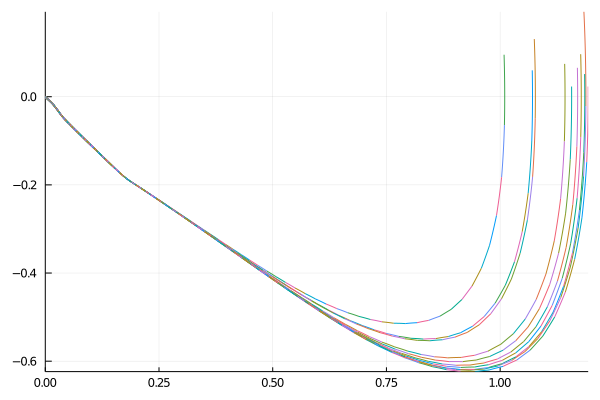

In [11]:
using Plots
fig = plot()
for simulation in simulations
    plot!(fig, simulation, vars=(1, 2), fmt=:png)
end
fig